
# 🧪 Model Zoo: Comparative Evaluation of Classifiers

This notebook loads and evaluates multiple models (Logistic Regression, Random Forest, XGBoost, CatBoost),
optionally showing performance metrics and visualizations.

Set `ShowOutput = True` below to display plots.
## Included Models
- Logistic Regression
- Random Forest
- XGBoost
- CatBoost

Models are expected to be pre-trained in their respective notebooks.


In [10]:
ShowOutput = True

In [11]:

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Best hyperparameters: {'n_estimators': 264, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2', 'class_weight': None}


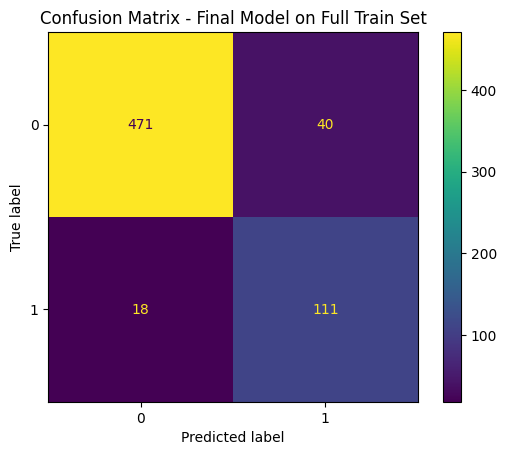

,Metric,Value
0,ROC AUC,0.8911
1,PR AUC,0.6607
2,F1 Score,0.7929
3,Matthews Corrcoef,0.7390
4,Accuracy,0.9094


In [12]:
%run SupervisedModels/OptimizedRandomForest.ipynb

## 📊 Optimized Random Forest Classifier Summary

This notebook trains and evaluates a **Random Forest classifier** to predict whether an individual is classified as having ASD based on various demographic and questionnaire-based features. The workflow includes preprocessing, hyperparameter tuning, and model evaluation, producing a high-performing, interpretable ensemble model.

### 🛠️ Key Components:
- **Preprocessing**: Handles missing values, scales numerical features, and performs SMOTE to address class imbalance.
- **Feature Set**: Excludes direct leakage from ASD score columns, focusing on valid demographic and behavioral features.
- **Hyperparameter Tuning**: Utilizes **Optuna** with cross-validation to find the optimal combination of:
  - Number of trees (`n_estimators`)
  - Tree depth (`max_depth`)
  - Minimum samples per leaf/split
  - Feature subset size (`max_features`)
  - Class weighting (`class_weight`)

- **Model**: `RandomForestClassifier` with the best parameters found via tuning.

---

### 🌲 Why Random Forest?
Random Forest is a **bagging ensemble** method that builds multiple decision trees and averages their predictions. It is:
- **Robust to overfitting**
- **Handles high-dimensional data well**
- **Provides feature importance estimates**
- Performs well even without complex data transformations

---

### ✅ Final Model Performance (on training data) as seen in table above:
| Metric                | Value                        |
|-----------------------|------------------------------|
| **ROC AUC**           | `final_roc_auc`          |
| **PR AUC**            | `final_pr_auc`           |
| **F1 Score**          | `final_f1`               |
| **Matthews Corrcoef** | `final_mcc`              |
| **Accuracy**          | `accuracy`               |

These metrics indicate a well-balanced model with strong predictive performance on the full training set. The **F1 Score** and **MCC** highlight effectiveness in imbalanced classification scenarios, while **ROC AUC** and **PR AUC** show the model's ability to discriminate between classes.

---



Besthyperparameters: {'penalty': 'l2', 'C': 0.005215383130545366}


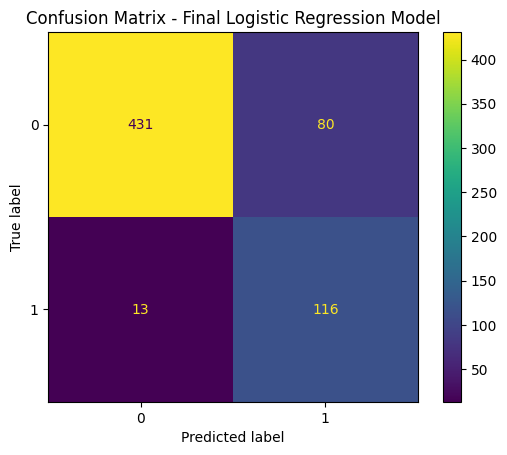

,Metric,Value
0,ROC AUC,0.8713
1,PR AUC,0.5525
2,F1 Score,0.7138
3,Matthews Corrcoef,0.6464
4,Accuracy,0.8547


In [13]:
%run SupervisedModels/OptimizedLogisticRegression.ipynb

## 🧠 Optimized Logistic Regression Classifier Summary

This notebook runs a pipeline to train and tune a **Logistic Regression** model for ASD classification. It is designed to be interpretable, simple, and efficient — while leveraging robust cross-validation and metric tracking to ensure effectiveness.

---

### 🧪 Workflow Overview:

- **Preprocessing**: 
  - Missing values are imputed.
  - Data is scaled with `StandardScaler`.
  - Class imbalance is handled via **SMOTE**.
  
- **Hyperparameter Tuning**:
  - Uses **Optuna** to search over:
    - `C` (inverse regularization strength)
    - `penalty` (`l1` or `l2`)
  - Only solvers that support both `l1` and `l2` penalties (like `'liblinear'`) are used.

- **Cross-Validation**:
  - A 5-fold `StratifiedKFold` is applied for robust validation during tuning.

---

### 📦 Why Logistic Regression?

Logistic Regression is:
- **Interpretable**: Easy to explain the influence of each feature.
- **Fast and lightweight**: Great for baseline models or production APIs.
- **Effective** on linearly separable problems and surprisingly competitive with tuned regularization.

---

### 📊 Final Model Performance (on training data):
After training the best model with tuned hyperparameters on the full training set, the following performance was recorded:

| Metric                | Value Placeholder             |
|-----------------------|-------------------------------|
| **ROC AUC**           | `final_roc_auc`           |
| **PR AUC**            | `final_pr_auc`            |
| **F1 Score**          | `final_f1`                |
| **Matthews Corrcoef** | `final_mcc`               |
| **Accuracy**          | `accuracy`                |

These metrics show balanced precision/recall behavior, strong binary classification ability (ROC AUC), and robustness to class imbalance (MCC).

---

Number of rows with a 1 in class_ASD: 48
Number of rows with a 0 in class_ASD: 152

Final Model Performance on Holdout Set:
ROC-AUC: 0.8945
PR-AUC: 0.6623
F1 Score: 0.6216
Matthews Correlation Coefficient: 0.5185


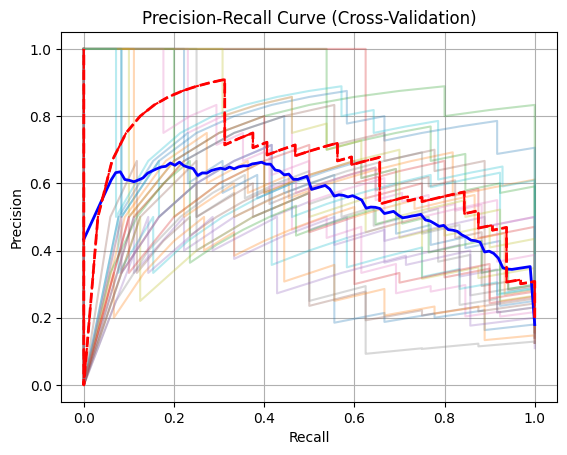

Best hyperparameters: {'n_estimators': 483, 'max_depth': 8, 'learning_rate': 0.01269577063276585, 'gamma': 4.121404263636087, 'subsample': 0.6322299242912702, 'colsample_bytree': 0.5940938050142573, 'scale_pos_weight': 2.052272467985429}
F1 Score: 0.7687296416938111
ROC AUC: 0.9630455559095255
Accuracy: 0.8890625
Precision: 0.6629213483146067
Recall: 0.9147286821705426


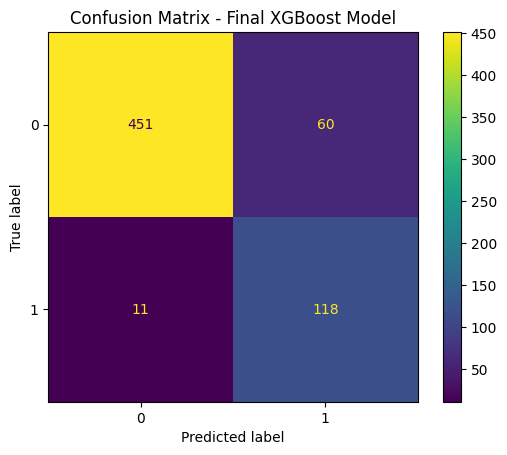

In [ ]:

# Load all model notebooks
%run SupervisedModels/SupervisedLogisticRegression.ipynb
#%run SupervisedModels/SupervisedRandomForest.ipynb

%run SupervisedModels/SupervisedXGBoost.ipynb
#%run SupervisedModels/SupervisedCatBoost.ipynb


In [25]:

def evaluate_model(model, name, X, y, threshold=0.5, show=False):
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()
    X = imputer.fit_transform(X)
    X = scaler.fit_transform(X)
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    roc_auc = roc_auc_score(y, y_proba)
    f1 = f1_score(y, y_pred)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)

    if show:
        print(f"### {name} ###")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        ConfusionMatrixDisplay.from_predictions(y, y_pred)
        plt.title(f"Confusion Matrix - {name}")
        plt.show()

    return {
        "Model": name,
        "ROC AUC": roc_auc,
        "F1 Score": f1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    }


### Logistic Regression ###
ROC AUC: 0.9016
F1 Score: 0.6301
Accuracy: 0.8313
Precision: 0.5610
Recall: 0.7188


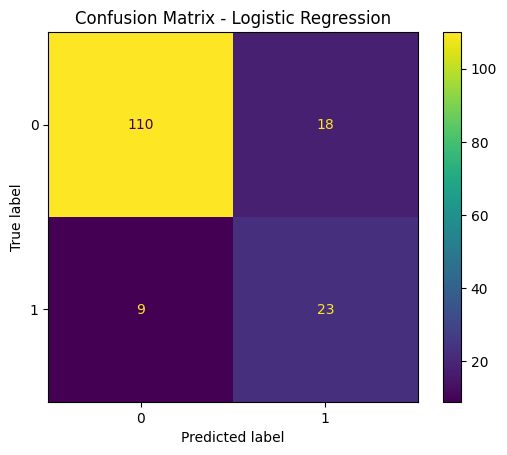

### XGBoost ###
ROC AUC: 0.8911
F1 Score: 0.6374
Accuracy: 0.7937
Precision: 0.4915
Recall: 0.9062


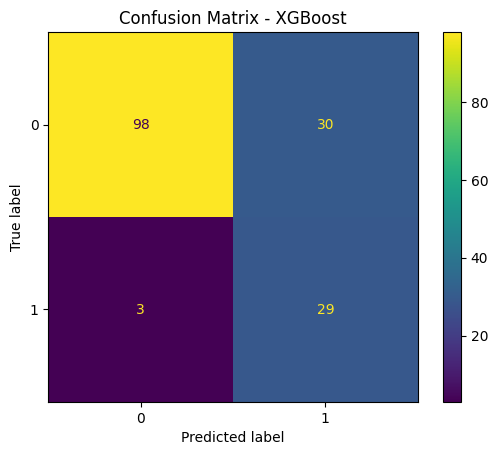

,ROC AUC,F1 Score,Accuracy,Precision,Recall
Model,,,,,
Logistic Regression,0.901611,0.630137,0.83125,0.560976,0.71875
XGBoost,0.891113,0.637363,0.79375,0.491525,0.90625


In [26]:

# Assuming X_test and y_test are already loaded in the model notebooks
results = []
results.append(evaluate_model(lr_model, "Logistic Regression", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))
#results.append(evaluate_model(rf_model, "Random Forest", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))
results.append(evaluate_model(xgb_model, "XGBoost", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))
#results.append(evaluate_model(cb_model, "CatBoost", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))

results_df = pd.DataFrame(results).set_index("Model")
results_df
